# Reinforcement learning algorithm

## Install dependencies

In [1]:
pip install tensorflow-gpu tensorflow stable-baselines3 gym-anytrading gym==0.20

     |████████████████████████████████| 1.6 MB 608 kB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.20.0-py3-none-any.whl size=1650481 sha256=336bf13a7381dc9f41bf2ea81ffa9efd955a008cf0a87bea29af94eab30d2a46
  Stored in directory: /home/benjamin/.cache/pip/wheels/27/04/98/54d49e63bfcf3c83059832a76533f11f297a2030c397d82c6e
Successfully built gym
ERROR: stable-baselines3 1.3.0 has requirement gym<0.20,>=0.17, but you'll have gym 0.20.0 which is incompatible.
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
Note: you may need to restart the kernel to use updated packages.


## Import Gym stuffs (RL environment)

In [2]:
import gym
import gym_anytrading

## Import Stable baselines stuffs (RL algorithms and tools)

In [3]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

## Import utils

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## Import market data

In [25]:
market_data = pd.read_csv('btc_data.csv', thousands=',')
market_data["Date"] = pd.to_datetime(market_data['Date'])
market_data["Open"] = pd.to_numeric(market_data['Open'], downcast='float')
market_data["High"] = pd.to_numeric(market_data['High'], downcast='float')
market_data["Low"] = pd.to_numeric(market_data['Low'], downcast='float')
market_data["Close"] = pd.to_numeric(market_data['Close'], downcast='float')
market_data.dtypes

Date     datetime64[ns]
Open            float32
High            float32
Low             float32
Close           float32
dtype: object

In [26]:
market_data["Date"] = pd.to_datetime(market_data["Date"])
market_data.set_index("Date", inplace=True)

In [27]:
market_data.dtypes

Open     float32
High     float32
Low      float32
Close    float32
dtype: object

## Create Gym environment

In [53]:
env = gym.make('forex-v0', df=market_data, frame_bound=(10, 100), window_size=5)

## Build environment

info {'total_reward': -270560000.0, 'total_profit': 0.849202110492923, 'position': 0}


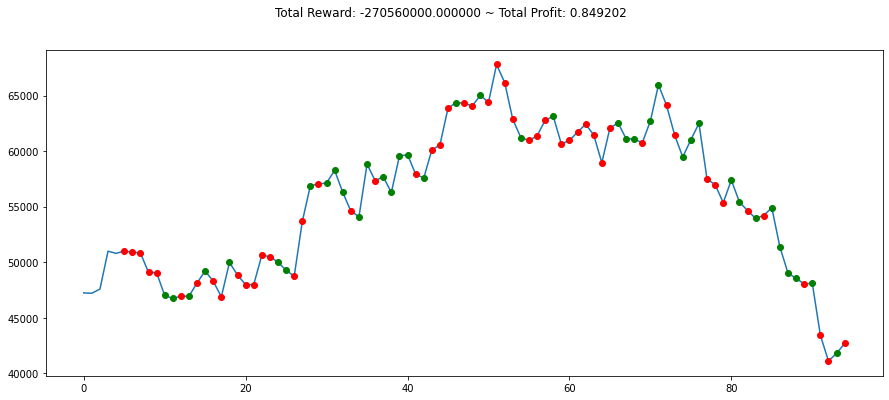

In [54]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

## Build and train env with AI

In [68]:
env_maker = lambda: gym.make('forex-v0', df=market_data, frame_bound=(5, 250), window_size=5)
env = DummyVecEnv([env_maker])

In [69]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 1355      |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -8.69e+06 |
|    value_loss         | 4.82e+14  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1434      |
|    iterations         | 200       |
|    time_elapsed       | 0         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.656    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 3.72e+0

------------------------------------
| time/                 |          |
|    fps                | 1470     |
|    iterations         | 1700     |
|    time_elapsed       | 5        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.34    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 3.84e+07 |
|    value_loss         | 4.33e+15 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1472     |
|    iterations         | 1800     |
|    time_elapsed       | 6        |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.391   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 4.11e+06 |
|    value_loss         | 1.11e+14 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1478      |
|    iterations         | 3300      |
|    time_elapsed       | 11        |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -2.65e+07 |
|    value_loss         | 1.63e+15  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1479     |
|    iterations         | 3400     |
|    time_elapsed       | 11       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.623   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | 8.71e+06 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1470      |
|    iterations         | 4900      |
|    time_elapsed       | 16        |
|    total_timesteps    | 24500     |
| train/                |           |
|    entropy_loss       | -0.575    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4899      |
|    policy_loss        | -3.74e+07 |
|    value_loss         | 3.99e+15  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1470      |
|    iterations         | 5000      |
|    time_elapsed       | 17        |
|    total_timesteps    | 25000     |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4999      |
|    policy_loss        | -3.68e+06 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1472     |
|    iterations         | 6500     |
|    time_elapsed       | 22       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | 2.72e+07 |
|    value_loss         | 1.42e+15 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1471     |
|    iterations         | 6600     |
|    time_elapsed       | 22       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | 1.13e+07 |
|    value_loss         | 6.23e+14 |
-

------------------------------------
| time/                 |          |
|    fps                | 1473     |
|    iterations         | 8100     |
|    time_elapsed       | 27       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 2.31e+07 |
|    value_loss         | 2.58e+15 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1473      |
|    iterations         | 8200      |
|    time_elapsed       | 27        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | -2.23e+06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1462     |
|    iterations         | 9700     |
|    time_elapsed       | 33       |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | 1.24e+06 |
|    value_loss         | 1.73e+14 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1462     |
|    iterations         | 9800     |
|    time_elapsed       | 33       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.615   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 1.23e+07 |
|    value_loss         | 9.03e+14 |
-

------------------------------------
| time/                 |          |
|    fps                | 1455     |
|    iterations         | 11300    |
|    time_elapsed       | 38       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.0237  |
|    explained_variance | -5.58    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 7.52e-07 |
|    value_loss         | 3.55e-07 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1453      |
|    iterations         | 11400     |
|    time_elapsed       | 39        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.0223   |
|    explained_variance | -16.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -1.83e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1444     |
|    iterations         | 12900    |
|    time_elapsed       | 44       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.0199  |
|    explained_variance | -79.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 9.23e-07 |
|    value_loss         | 1.51e-07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1444     |
|    iterations         | 13000    |
|    time_elapsed       | 44       |
|    total_timesteps    | 65000    |
| train/                |          |
|    entropy_loss       | -0.00965 |
|    explained_variance | 0.0733   |
|    learning_rate      | 0.0007   |
|    n_updates          | 12999    |
|    policy_loss        | 6.46e-06 |
|    value_loss         | 3.25e-05 |
-

------------------------------------
| time/                 |          |
|    fps                | 1442     |
|    iterations         | 14500    |
|    time_elapsed       | 50       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.00323 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | -7.2e-08 |
|    value_loss         | 4.8e-08  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1442      |
|    iterations         | 14600     |
|    time_elapsed       | 50        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.00145  |
|    explained_variance | -108      |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | -1.49e-08 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1439      |
|    iterations         | 16100     |
|    time_elapsed       | 55        |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.000845 |
|    explained_variance | -0.446    |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | -2.03e-11 |
|    value_loss         | 7.2e-14   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1438      |
|    iterations         | 16200     |
|    time_elapsed       | 56        |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -0.000858 |
|    explained_variance | -32       |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | 1.99e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1438      |
|    iterations         | 17700     |
|    time_elapsed       | 61        |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -0.000842 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | -5.22e-12 |
|    value_loss         | 3.52e-15  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1438      |
|    iterations         | 17800     |
|    time_elapsed       | 61        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.000836 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 7.56e-13  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1435      |
|    iterations         | 19300     |
|    time_elapsed       | 67        |
|    total_timesteps    | 96500     |
| train/                |           |
|    entropy_loss       | -0.000825 |
|    explained_variance | -5.72     |
|    learning_rate      | 0.0007    |
|    n_updates          | 19299     |
|    policy_loss        | 1.12e-10  |
|    value_loss         | 2.84e-12  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1434      |
|    iterations         | 19400     |
|    time_elapsed       | 67        |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -0.000822 |
|    explained_variance | -4.03     |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | -2.55e-09 |
|    value_l

## Evaluation

In [65]:
env = gym.make('forex-v0', df=market_data, frame_bound=(200, 220), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -15590000.0, 'total_profit': 0.9587041666666667, 'position': 1}


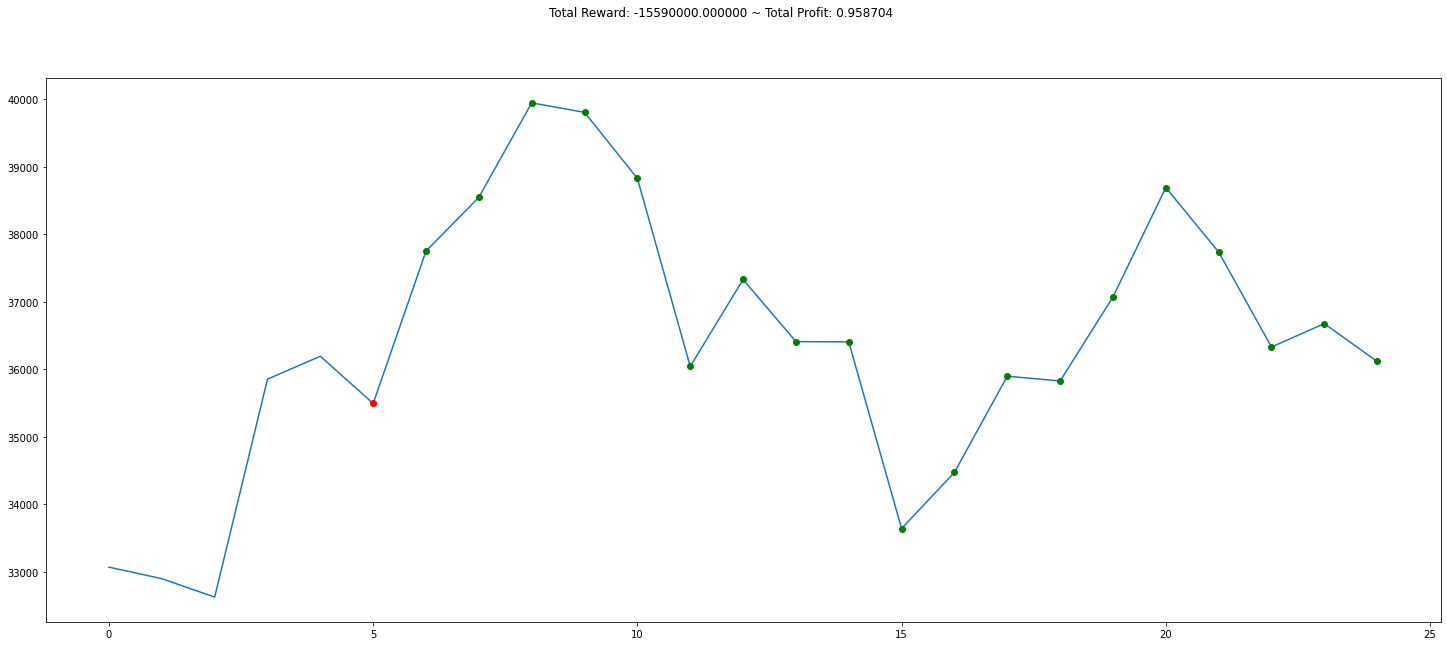

In [66]:
plt.figure(figsize=(25, 10))
plt.cla()
env.render_all()
plt.show()